<a href="https://colab.research.google.com/github/Jesimsim/ds-section2-project/blob/main/section2_project_eda_ing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math


# from sklearn. import
# from sklearn.metric import f1_score

#### **필요코드 설치**

In [ ]:
# Google Colab을 사용하는 경우 해당 셀을 실행하세요
import sys

if "google.colab" in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install --upgrade xgboost


import xgboost
import warnings

warnings.filterwarnings("ignore")
# xgboost.config.set_config(verbosity=0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 4.9 MB/s 
     |████████████████████████████████| 965 kB 45.8 MB/s 
     |████████████████████████████████| 295 kB 58.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.6.2 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.13.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# sklearn
!pip install --exists-action=i scikit-learn

In [ ]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

#### **디스플레이 옵션**

In [ ]:
# 디스플레이 옵션 조정
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 2000)

# 숫자 전체 잘보이게
pd.set_option('float_format', '{:}'.format)

# 숫자 소수점한자리만 보이게
pd.set_option('display.float_format', '{:,.1f}'.format)

In [ ]:
pd.reset_option("^display")

#### **데이터 불러오기**

In [1]:
# 드라이브 불러오기
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
filename = 'Apt_total_eda.csv'
df = pd.read_csv(filename, encoding='utf-8', encoding_errors='ignore', engine='python', index_col=0).reset_index(drop=True) #30초
df = df.astype({'date_year' : 'str', 'date_month' : 'str'})
df.head()

,date,address,date_year,date_month,date_day,add_gu,add_dong,address_num,address_num_first,address_num_second,...,price,date_on_sale,deal_type,real_estate_office,cpi,area_type,building_year,river,apt_brand,baserate
0,20130101,서울특별시 은평구 대조동,2013,1,1,은평구,대조동,04월 18일,4.0,18.0,...,16900,NaN,-,-,93.134,1,1.0,0,0.0,2.75
1,20130101,서울특별시 구로구 구로동,2013,1,1,구로구,구로동,1280,1280.0,0.0,...,34500,NaN,-,-,93.134,2,6.0,0,0.0,2.75
2,20130101,서울특별시 동작구 사당동,2013,1,1,동작구,사당동,1155,1155.0,0.0,...,40250,NaN,-,-,93.134,3,4.0,0,0.0,2.75
3,20130101,서울특별시 은평구 응암동,2013,1,1,은평구,응암동,176,176.0,0.0,...,27500,NaN,-,-,93.134,2,5.0,0,2.0,2.75
4,20130101,서울특별시 중구 신당동,2013,1,1,중구,신당동,851,851.0,0.0,...,62000,NaN,-,-,93.134,4,2.0,0,2.0,2.75


In [ ]:
#공원 불러오기 / area 1000m2 == 0.001km2
filename5 = 'park.csv'
df_park = pd.read_csv(filename5, encoding='utf-8', encoding_errors='ignore', engine='python', names=['add_gu','count','duplicate','area','year'], header=None).iloc[1:,:]

filename6 = '자치구별면적.csv'
df_area = pd.read_csv(filename6,encoding='utf-8', encoding_errors='ignore', engine='python').iloc[:25,:]
df_area['면적_km2'] = df_area['면적_km2'].astype('float') * 1000000
df_area = df_area.rename(columns={'면적_km2':'area_m2'})
df_area

# 해당하는 값에 할당 / 면적 m2으로 환산
lst_park = df_area.자치구.values
for i in range(0, len(lst_park)): #30초!!!
  result = df_park[df_park['add_gu'].str.contains(lst_park[i])]
  df_park.loc[list(result.index), 'area_gu'] = df_area.iloc[i, 1]
df_park['area'] = df_park['area'].str.replace(',','').astype('float') * 1000 
df_park['ratio_park'] = df_park.area / df_park.area_gu
df_park

,add_gu,count,duplicate,area,year,area_gu,ratio_park
1,소계,"2,868",33,168896800.0,2019,NaN,NaN
2,종로구,106,2,11556100.0,2019,23910000.0,0.483317
3,중구,73,2,3155100.0,2019,9960000.0,0.316777
4,용산구,110,1,1779600.0,2019,21870000.0,0.081372
5,성동구,86,1,3100000.0,2019,16860000.0,0.183867
...,...,...,...,...,...,...,...
256,관악구,113,3,12431400.0,2020,29570000.0,0.420406
257,서초구,181,1,15072600.0,2020,46980000.0,0.320830
258,강남구,162,1,7768700.0,2020,39500000.0,0.196676
259,송파구,173,1,4771400.0,2020,33870000.0,0.140874


In [ ]:
# park 정보
list(df_park.add_gu.unique())

lst_gu =  ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
 '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
 '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']


# 연도별로 

def classi_park(x):
  y = df[df['date_year'] == x] #df에서 해당하는 연도만 추출한 데이터프레임

  df2 = df.copy()
  for i in range(0, len(lst_gu)): #30초!!!
    result = y[y['add_gu'].str.contains(lst_gu[i])] #연도 + 해당하는 구의 인덱스만 추출
    df2.loc[list(result.index), 'park_area'] = df_park[df_park.year == x].iloc[i+1, 3] #그인덱스에 df_park의 값 집어넣기
    df2.loc[list(result.index), 'park_count'] = df_park[df_park.year == x].iloc[i+1, 1]
    df2.loc[list(result.index), 'park_ratio'] = df_park[df_park.year == x].iloc[i+1, 6]


  df.loc[list(df2.index), 'park_area'] = df2.loc[list(df2.index), 'park_area']
  df.loc[list(df2.index), 'park_count'] = df2.loc[list(df2.index), 'park_count']
  df.loc[list(df2.index), 'park_ratio'] = df2.loc[list(df2.index), 'park_ratio']

classi_park('2013')
classi_park('2014')
classi_park('2015')
classi_park('2016')
classi_park('2017')
classi_park('2018')
classi_park('2019')
classi_park('2020')
classi_park('2021') #30초~2분


# 2022 / 전년도 정보 사용

y = df[df['date_year'] == '2022'] #df에서 해당하는 연도만 추출한 데이터프레임

df2 = df.copy()
for i in range(0, len(lst_gu)): #30초!!!
  result = y[y['add_gu'].str.contains(lst_gu[i])] #연도 + 해당하는 구의 인덱스만 추출
  df2.loc[list(result.index), 'park_area'] = df_park[df_park.year == '2021'].iloc[i+1, 3] #그인덱스에 df_park의 값 집어넣기
  df2.loc[list(result.index), 'park_count'] = df_park[df_park.year == '2021'].iloc[i+1, 1]
  df2.loc[list(result.index), 'park_ratio'] = df_park[df_park.year == '2021'].iloc[i+1, 6]


df.loc[list(df2.index), 'park_area'] = df2.loc[list(df2.index), 'park_area']
df.loc[list(df2.index), 'park_count'] = df2.loc[list(df2.index), 'park_count']
df.loc[list(df2.index), 'park_ratio'] = df2.loc[list(df2.index), 'park_ratio']

In [ ]:
# EDA 확인
df.iloc[780500]

date                       20220531
address               서울특별시 노원구 공릉동
date_year                      2022
date_month                        5
date_day                         31
add_gu                          노원구
add_dong                        공릉동
address_num                     715
address_num_first             715.0
address_num_second              0.0
address_street              섬밭로 123
apt_name               시영3차(라이프)아파트
area                          34.44
floor                          15.0
construction_year            1994.0
price                         42000
date_on_sale                    NaN
deal_type                      중개거래
real_estate_office           서울 노원구
cpi                          107.56
area_type                         2
building_year                  28.0
river                             0
apt_brand                       0.0
baserate                       1.75
park_area                14742900.0
park_count                      190
park_ratio                 0

#### **데이터 시각화**

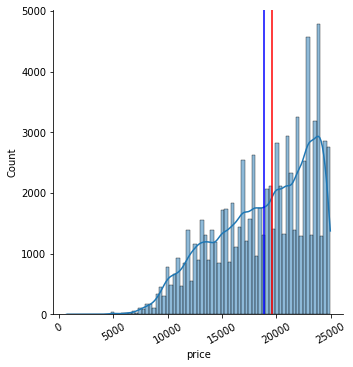

In [ ]:
sns.displot(df[df.price < 25000].price, kde=True); #백만단위> 10,000,000,000 (백억단위) / 20억 이하 매물로 줄이기
plt.axvline(df[df.price < 25000].price.mean(), color='blue');
plt.axvline(df[df.price < 25000].price.median(), color='red');
plt.xticks(rotation=30);

In [ ]:
df[df.price > 200000].price.count() 
#140억 이상 > 1개
#100억 이상 > 5개
#70억 이상 > 83개
#40억 이상 > 1362개 (타워팰리스 등) 
#20억 이상 > 16493개 (타워팰리스 등)
#2억5천 이하 > 85000개
#1억5천 이하 > 18000개
#1억 이하 > 2000개 / 
#5천 이하 > 10개 / 16년도 이전(삭제)

# df[(df.price < 400000)&(df.price > 200000)].apt_name.unique()

16493

In [ ]:
df[df.price < 5000].date_year.unique() #5천이하 시기
df[(df.price < 400000)&(df.price > 200000)].apt_name.unique() #20억~40억 사이 매물

array(['2013', '2014', '2015', '2016'], dtype=object)

In [ ]:
# 드라이브 불러오기
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

In [3]:
# 파일불러오기
filename = 'Apt_total_eda2.csv'
df = pd.read_csv(filename, encoding='utf-8', encoding_errors='ignore', engine='python', index_col=0).reset_index(drop=True) #30초

df.address_street = df.address_street.str.replace(' ','')

# 데이터타입 변경
# df = df.astype({'date_year' : 'str', 'date_month' : 'str'})

# 가격분포 확인 후 아웃라이어 제거 / 20억 이상 > 16493개 특정 하이엔드 아파트에 치중되어있었음
df = df[(df.price > 5000)&(df.price < 200000)]

# 면적분포 확인 후 아웃라이어 제거 / 175m2 이상 > 4000개
df = df[df['area'] <= 175] 

# cpi 결측치 최근값으로 부여하기
df.cpi = df.cpi.fillna(108.93)

# 시계열요소 상관관계 부여 / 기준금리와 소비자물가지수간
df['newrate'] = df['baserate'] * df['cpi']


# 지역분류
#- 동남권(서초 강남 송파 관악)
# -서남권(강서 양천 구로 영등 동작 관악 금천)
# -동북권(도봉 노원 강북 성북 동대문 중랑 성동 광진)
# -서북권(은평 서대문 마포 종로 중구 용산)

lst_southeast = ['서초구', '강남구', '송파구','관악구']
lst_southwest = ['강서구', '양천구', '구로구','영등포구','동작구','관악구','금천구']
lst_northeast = ['도봉구', '노원구', '강북구','성북구','동대문구','중랑구','성동구','광진구']
lst_notrhwest = ['은평구', '서대문구', '마포구','종로구','중구','용산구']

search = '|'.join(lst_southeast)
result = df[df['add_gu'].str.contains(search)]
df.loc[list(result.add_gu.index), 'zone'] = 1

search = '|'.join(lst_southwest)
result = df[df['add_gu'].str.contains(search)]
df.loc[list(result.add_gu.index), 'zone'] = 2

search = '|'.join(lst_northeast)
result = df[df['add_gu'].str.contains(search)]
df.loc[list(result.add_gu.index), 'zone'] = 3

search = '|'.join(lst_notrhwest)
result = df[df['add_gu'].str.contains(search)]
df.loc[list(result.add_gu.index), 'zone'] = 4


# 구 인코딩 / 순위 설정하기

df_rank = pd.DataFrame(df.groupby(['date_year','add_gu'])['price'].mean()).sort_values(['date_year','price'], ascending=False).reset_index()
df_rank['rank_gu'] = list(range(1,26))*10
df_rank['date_year'] = df_rank['date_year'].astype('int') + 1 #전년도 순위 > 이번년도에 부여하기 위해
df_rank

# 구 인코딩 / 2013 > 그순위 그대로

df_rank_2013 = pd.DataFrame(df.groupby(['date_year','add_gu'])['price'].mean()).sort_values(['date_year','price'], ascending=False).reset_index()
df_rank_2013['rank_gu'] = list(range(1,26))*10
df_rank_2013

# 구 인코딩 / 해당하는 곳에 값 부여
df = pd.merge(df, df_rank.drop('price', axis=1), how='left', left_on=['date_year', 'add_gu'], right_on=['date_year','add_gu'])
df = pd.merge(df, df_rank_2013.drop('price', axis=1), how='left', left_on=['date_year', 'add_gu'], right_on=['date_year','add_gu'])

df['rank_gu_x'] = df['rank_gu_x'].fillna(df['rank_gu_y'])
df = df.rename(columns={'rank_gu_x':'rank_gu'})
df = df.drop('rank_gu_y',axis=1)


# 최저임금
filename9 = 'min_wage.csv'
df_wage = pd.read_csv(filename9, encoding='utf-8', encoding_errors='ignore', engine='python')
df_wage = df_wage.rename(columns={' min_wage': 'min_wage'})

df = pd.merge(df, df_wage, how='left', left_on=['date_year'], right_on=['date_year'])


# 아파트 정보 병합
filename10 = '서울시_공동주택_정보.csv'
df_aptinfo = pd.read_csv(filename10, encoding='cp949',encoding_errors='ignore',engine='python') 
df_aptinfo = df_aptinfo.rename(columns={'k-아파트명' : 'apt_name', '주소(시군구)': 'add_gu', '주소(읍면동)':'add_dong', '주소(도로명)' :'add_street',
       'k-세대타입(분양형태)':'type_sale', 'k-관리방식':'type_manage', 'k-복도유형':'type_corridor', 'k-난방방식':'type_fuel', 'k-전체세대수':'apt_flat_num',
       'k-건설사(시공사)':'contractor', '주차대수':'parking_lot_num', 
       '좌표X':'location_x', '좌표Y':'location_y'})

df_aptinfo['area_ratio'] = (df_aptinfo['k-연면적'] / df_aptinfo['건축면적'])*100 # 용적률 = 연면적 / 건축면적
df_aptinfo = df_aptinfo[['apt_name', 'add_gu', 'add_dong', 'add_street','type_sale','type_manage', 'type_corridor', 'type_fuel', 'apt_flat_num', 'area_ratio','kapt도로명주소',
                        'contractor','parking_lot_num','location_x','location_y']]

df_aptinfo.kapt도로명주소 = df_aptinfo.kapt도로명주소.fillna('no no')

from numpy import inf
df_aptinfo.iloc[df_aptinfo[df_aptinfo['area_ratio'] == inf].index,9] = 0
df_aptinfo.iloc[df_aptinfo[df_aptinfo['area_ratio'] == 0].index,9] = -1

# 인코딩 / 복도유형 (출현순서)
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '복도식'].index,6] = 1
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '계단식'].index,6] = 2
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '혼합식'].index,6] = 3
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '타워형'].index,6] = 4
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_corridor'] == '기타'].index,6] = 0


# 인코딩 / 난방유형 (출현순서)
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_fuel'] == '중앙난방'].index,7] = 1
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_fuel'] == '지역난방'].index,7] = 2
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_fuel'] == '개별난방'].index,7] = 3
df_aptinfo.iloc[df_aptinfo[df_aptinfo['type_fuel'] == '기타'].index,7] = 0


# 키 부여 / 주소
df_aptinfo['add_new'] = None
df_aptinfo.kapt도로명주소 = df_aptinfo.kapt도로명주소.astype('str')

for i in range(0, df_aptinfo.shape[0]):
  df_aptinfo.iloc[i, -1] = df_aptinfo.iloc[i, 10].split(' ')[-2] + df_aptinfo.iloc[i, 10].split(' ')[-1]

df = pd.merge(df, df_aptinfo[['type_sale','type_manage','type_fuel','apt_flat_num','area_ratio','parking_lot_num','location_x','location_y','add_new']]
         , how='left',left_on=['address_street'], right_on=['add_new']) #192624

df_aptinfo.head()


# 국제유가 병합
filename = '국제유가.csv' #월별 국제유가
df_dubaioil = pd.read_csv(filename, encoding='cp949',encoding_errors='ignore',engine='python').T.iloc[2:,0].reset_index()
# df_dubaioil['date_year'] = df_dubaioil['index'].split('\.')[0]
df_dubaioil['date_year'] = None
df_dubaioil['date_month'] = None
for i in range(0, df_dubaioil.shape[0]):
  df_dubaioil.iloc[i, -2] = df_dubaioil['index'].str.split('\.')[i][0]
  df_dubaioil.iloc[i, -1] = df_dubaioil['index'].str.split('\.')[i][1]

df_dubaioil = df_dubaioil[['date_year','date_month',0]]
df_dubaioil = df_dubaioil.rename(columns={0:'dubaioilrate'})

#없는데이터추가
df2_add = pd.DataFrame({'date_year' : ['2022', '2022'], 'date_month' : ['10', '11'], 'dubaioilrate' : ['90.9', '86.9']})
df_dubaioil = df_dubaioil.append(df2_add, ignore_index = True)

df_dubaioil = df_dubaioil.astype({'date_year':'int','date_month':'int'})
df_dubaioil = df_dubaioil.astype({'date_year':'str','date_month':'str'})
df = df.astype({'date_year':'str','date_month':'str'})
df = pd.merge(df, df_dubaioil, how='left', left_on=['date_year','date_month'], right_on=['date_year','date_month'])

# 환율 병합
filename = 'dollar_rate.csv' #월별 국제유가
df_dollar = pd.read_csv(filename, encoding='utf-8',encoding_errors='ignore',engine='python')
df_dollar = df_dollar.astype({'date':'str'})

df_dollar['date_year'] = None
df_dollar['date_month'] = None
for i in range(0, df_dollar.shape[0]):
  df_dollar.iloc[i, -2] = df_dollar['date'].str.split('\.')[i][0]
  df_dollar.iloc[i, -1] = df_dollar['date'].str.split('\.')[i][1]

df_dollar = df_dollar[['date_year','date_month','dollar_rate']]


df_dollar = df_dollar.astype({'date_year':'int','date_month':'int'})
df_dollar = df_dollar.astype({'date_year':'str','date_month':'str'})
df = df.astype({'date_year':'str','date_month':'str'})
df = pd.merge(df, df_dollar, how='left', left_on=['date_year','date_month'], right_on=['date_year','date_month'])

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-3-f3cd5d4da039>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newrate'] = df['baserate'] * df['cpi']


In [21]:
val = df[(df['date_year'] <= '2021') & (df['date_year'] >= '2020') ]
val.isnull().sum()

date                       0
address                    0
date_year                  0
date_month                 0
date_day                   0
add_gu                     0
add_dong                   0
address_num               40
address_num_first         18
address_num_second        18
address_street             0
apt_name                   0
area                       0
floor                      0
construction_year          0
price                      0
date_on_sale          135335
deal_type                  0
real_estate_office         0
cpi                        0
area_type                  0
building_year              0
river                      0
apt_brand                  0
baserate                   0
park_area                  0
park_count                 0
park_ratio                 0
newrate                    0
zone                    6908
rank_gu                    0
min_wage                   0
type_sale              37508
type_manage            37388
type_fuel     

In [24]:
test = df[df['date_year'] >= '2022' ] 
test.isnull().sum()

date                      0
address                   0
date_year                 0
date_month                0
date_day                  0
add_gu                    0
add_dong                  0
address_num               2
address_num_first         1
address_num_second        1
address_street            0
apt_name                  0
area                      0
floor                     0
construction_year         3
price                     0
date_on_sale          10654
deal_type                 0
real_estate_office        0
cpi                       0
area_type                 0
building_year             3
river                     0
apt_brand                 0
baserate                  0
park_area                 0
park_count                0
park_ratio                0
newrate                   0
zone                    496
rank_gu                   0
min_wage                  0
type_sale              4796
type_manage            4791
type_fuel              4791
apt_flat_num        

In [18]:
df.dollar_rate = df.dollar_rate.str.replace(',','')

In [19]:
df_copy = df.fillna(0)
df_copy = df_copy.astype({'date_year':'int','date_month':'int','type_fuel':'float','dubaioilrate':'float','dollar_rate':'float'})
df_corr = df_copy.corr()
df_corr['price'].sort_values(ascending=False)

price                 1.000000
area                  0.509646
area_type             0.484333
date                  0.370701
min_wage              0.370409
date_year             0.369716
apt_brand             0.239275
cpi                   0.226830
parking_lot_num       0.220057
apt_flat_num          0.197892
river                 0.191974
floor                 0.143714
location_x            0.143201
location_y            0.142185
park_count            0.102465
type_fuel             0.079339
construction_year     0.073143
date_month            0.060821
date_on_sale          0.053581
dollar_rate           0.023421
building_year         0.014877
date_day              0.004443
area_ratio            0.003183
address_num_second   -0.035034
address_num_first    -0.044180
park_area            -0.095295
dubaioilrate         -0.108839
newrate              -0.206907
park_ratio           -0.216878
zone                 -0.220418
baserate             -0.225651
rank_gu              -0.532611
Name: pr

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 869246 entries, 0 to 869245
Data columns (total 43 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                869246 non-null  int64  
 1   address             869246 non-null  object 
 2   date_year           869246 non-null  object 
 3   date_month          869246 non-null  object 
 4   date_day            869246 non-null  int64  
 5   add_gu              869246 non-null  object 
 6   add_dong            869246 non-null  object 
 7   address_num         869005 non-null  object 
 8   address_num_first   869164 non-null  float64
 9   address_num_second  869164 non-null  float64
 10  address_street      869246 non-null  object 
 11  apt_name            869246 non-null  object 
 12  area                869246 non-null  float64
 13  floor               869245 non-null  float64
 14  construction_year   869243 non-null  float64
 15  price               869246 non-nul

#### **모델 작업**

In [ ]:
encoder = OneHotEncoder(use_cat_names=True])
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)

In [ ]:
#다중선형회귀모델
#이상치 제거 + onehotEncoder
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 데이터스플릿

df = df[(df.price > 5000)&(df.price < 200000)]
df = df.astype({'date_year' : 'int', 'date_month' : 'int', 'park_count':'int'})

train = df[df['date_year'] <= 2018]
val = df[(df['date_year'] <= 2020) & (df['date_year'] >= 2019) ]
test = df[df['date_year'] >= 2021]


target = 'price'
feature = ['add_gu','add_dong','area', 'floor','deal_type', 'cpi', #아파트 이름은 안되겠네
          'area_type', 'building_year', 'river', 'apt_brand', 'baserate',
          'park_area', 'park_count', 'park_ratio']

X_train = train[feature] 
y_train = train[target]
X_val = val[feature]  
y_val = val[target]

encoder = OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)


#모델학습 / onehot > 1분30초
pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, y_train) 



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 정확도 계산 / .score()
# R2(결정계수)는 예측값 도출하지 않아도(.predict) 바로 계산 가능
score = pipe.score(X_train, y_train) 
print(f'훈련 에러(R2): {score:.2f}') 
score = pipe.score(X_val, y_val) 
print(f'테스트 에러(R2): {score:.2f}')


# 지표계산 및 출력 / 인자
y_pred_train = pipe.predict(X_train) 
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)  #훈련셋의 MAE
mae_test = mean_absolute_error(y_val, y_pred_val) #테스트셋의 MAE

print(f'훈련 에러: {mae_train:.2f}') 
print(f'검증 에러: {mae_test:.2f}')


# 지표계산 및 출력 / 데이터프레임
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val)

evaluation1 = pd.DataFrame([['MSE', round(mse, 2)],['MAE', round(mae,2)],['RMSE', round(rmse,2)],['R2', round(r2,2)]], columns=['Metric', 'Score']) 
evaluation1


훈련 에러(R2): 0.83
테스트 에러(R2): -1773121980966977142784.00
훈련 에러: 8511.48
검증 에러: 46655086594059.81


,Metric,Score
0,MSE,2.811629e+30
1,MAE,4.665509e+13
2,RMSE,1.676791e+15
3,R2,-1.773122e+21
